# <center>Linear, Polynomial, and Decision Tree Regression</center>
<center>Shan-Hung Wu & DataLab</center>
<center>Fall 2021</center>

In [1]:
# inline plotting instead of popping out
%matplotlib inline

from IPython.display import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In this lab, we will guide you through the linear and polynomial regression using the Housing dataset ([description](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.names), [data](https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data)). We will also extend the Decision Tree and Random Forest classifiers that we have learned from our previous labs to solve the regression problem.

## Linear Regression
Regression models are used to predict target variables ($y$'s) in continuous space, which makes them attractive for

 * Understanding relationships between variables.
 * Evaluating trends.
 * Making forecasts.
 
Consider $y$ can be explained by the 1-D points ($x\in R$), the linear model is defined as:
$$\hat{y} = w_{0}+w_{1}x$$
Minimizing the sum of squared errors (SSE) can be understood as finding the best-fitting straight line through the example points. The best-fitting line is called the regression line (or hyperplane when  $x\in \mathbb{R}^D$, $D>1$ ), and the vertical offsets from the regression line to the data points are called the **residuals**, i.e. prediction errors, as shown in the following figure:
![](./fig-linear-regression.png)
Note that the  $w_0$  and  $w_1$  control the intercept/bias and slope of the regression line respectively.
## The Housing dataset
The Housing dataset from UCI repository collects information about houses in the suburbs of Boston. Following are the attributes:
```
1.  CRIM      Per capita crime rate by town
2.  ZN        Proportion of residential land zoned for lots over 25,000 sq.ft.
3.  INDUS     Proportion of non-retail business acres per town
4.  CHAS      Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
5.  NOX       Nitric oxides concentration (parts per 10 million)
6.  RM        Average number of rooms per dwelling
7.  AGE       Proportion of owner-occupied units built prior to 1940
8.  DIS       Weighted distances to five Boston employment centres
9.  RAD       Index of accessibility to radial highways
10. TAX       Full-value property-tax rate per \$10,000
11. PTRATIO   Pupil-teacher ratio by town
12. B         1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
13. LSTAT     % lower status of the population
14. MEDV      Median value of owner-occupied homes in $1000's 
```

Let's load the data first, and see head 5 data in dataset.

In [2]:
df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/'
    'housing/housing.data',
    header=None,
    sep='\s+')

df.columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Our goal is to predict the house prices ('MEDV'), which is in a continuous scale, using the values of some other variable. To select proper explanatory variables, we plot all the pairwise join distributions related to 'MEDV'.

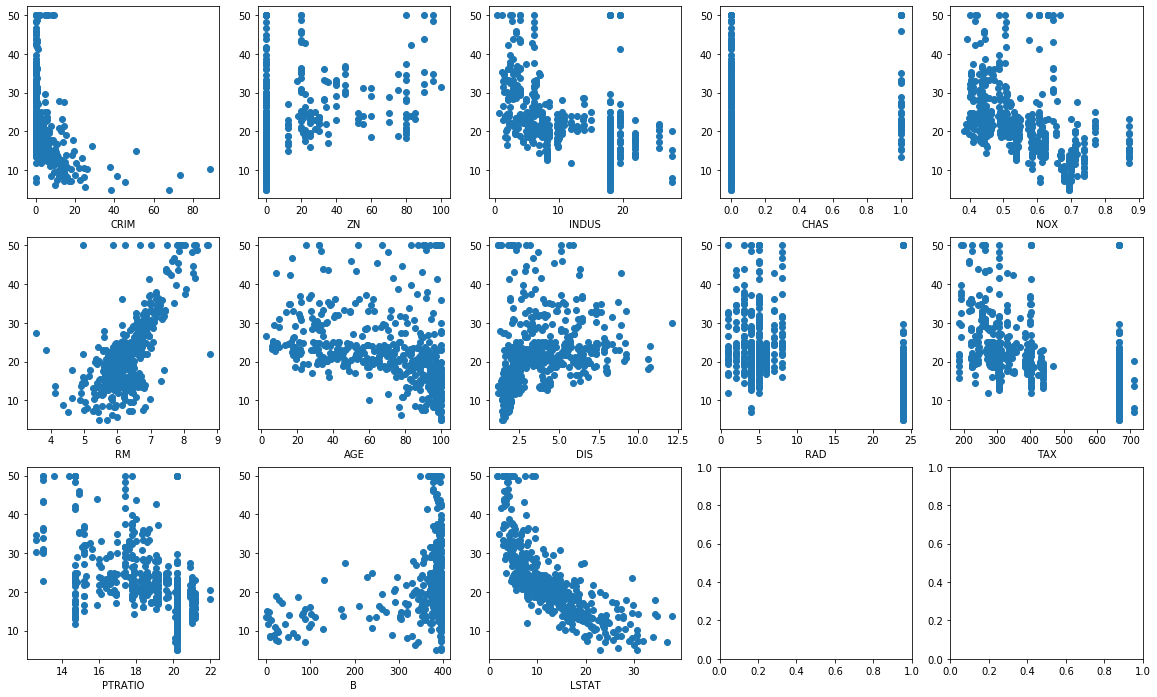

In [3]:
x_vars = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
    'PTRATIO', 'B', 'LSTAT'
]

_, subplot_arr = plt.subplots(3, 5, figsize=(20, 12))
for idx, x_var in enumerate(x_vars):
  x_idx = idx // 5
  y_idx = idx % 5
  subplot_arr[x_idx, y_idx].scatter(df[x_var], df['MEDV'])
  subplot_arr[x_idx, y_idx].set_xlabel(x_var)

plt.show()

Using this scatter-plot matrix, we can now quickly see how the data is distributed and whether it contains outliers. For example, we can see that there is a linear relationship between RM and the house prices MEDV. Furthermore, we can see in the histogram that both RM and MEDV variable seems to be normally distributed but MEDV contains several **outliers**, i.e. values that deviate from the majority values a lot. Let's use RM as the explanatory variable for our first linear regression task:

## Fitting a Linear Regression Model via Scikit-learn  
Scikit-learn has already implemented an LinearRegression class that we can make use of:

In [4]:
X_rm = df['RM'].values[:, np.newaxis]
y = df['MEDV'].values

slr = LinearRegression()
# fit 
slr.fit(X_rm, y)

y_pred = slr.predict(X_rm)

print('Slope (w_1): %.2f' % slr.coef_[0])
print('Intercept/bias (w_0): %.2f' % slr.intercept_)

Slope (w_1): 9.10
Intercept/bias (w_0): -34.67


We may interpret the slope 9.10 as the average increase in 'MEDV' due to 'RM'. In contrast, the intercept sometimes also has physical meaning, but not in this case. Since that there is no negative value of a house.  
  

  
Next, let's visualize how well the linear regression line fits the training data:

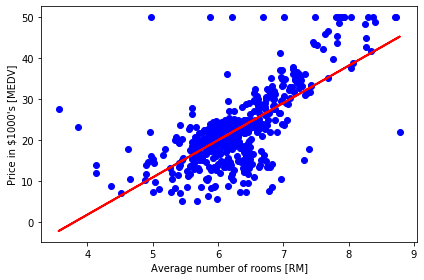

In [5]:
# To simplify our codes, predefine a function to visualize to regression line and data scatter plot.
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red', linewidth=2)
    return


lin_regplot(X_rm, y, slr)
plt.xlabel('Average number of rooms [RM]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.tight_layout()
plt.show()

As we can see, the linear regression line reflects the general trend that house prices tend to increase with the number of rooms. Interestingly, we also observe a curious line at  $y=50$ , which suggests that the prices may have been clipped.

## Multivariate Cases & Performance Evaluation
If we have multiple explanatory variables, we can't visualize the linear regression hyperplane in a two-dimensional plot. In this case, we need some other ways to evaluate the trained model. Let's proceed with the multivariate linear regression and evaluate the results using the mean squared error (MSE) and coefficient of determination ($R^2$):
   * MSE = $\dfrac{1}{N}\sum_{i=1}^{N}(y^{(i)}-\hat{y}^{(i)})^2$
   * $R^2$ = $1-$ Relative Squared Error(RSE) = $\dfrac{\sum_{i=1}^{N}(y^{(i)}-\hat{y}^{(i)})^2}{\sum_{i=1}^{N}(y^{(i)}-\bar{y})^2}$

In [6]:
X = df.iloc[:, :-1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

print('#Training data points: %d' % X_train.shape[0])
print('#Testing data points: %d' % X_test.shape[0])

# Standardization
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Training
slr = LinearRegression()
slr.fit(X_train_std, y_train)

# Testing
y_train_pred = slr.predict(X_train_std)
y_test_pred = slr.predict(X_test_std)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

#Training data points: 354
#Testing data points: 152
MSE train: 19.96, test: 27.20
R^2 train: 0.76, test: 0.67


A normal  $R^2$  value should fall between between 0 and 1, and the higher  $R^2$  the better.In practice, we often consider $R^2>0.8$  as good. if $R^2$ is negative, it means that your model doesn't fit your data.  
NOTE: it is important to standardize the explanatory variables in multivariate regression in order to improve the conditioning of the cost function and to prevent attributes with large values from dominating.

## Residual Plot
In addition, the **residual plot** is a commonly used graphical analysis for a regression model to detect nonlinearity and outliers. In the case of a perfect prediction, the residuals would be exactly zero, which we will probably never encounter in realistic and practical applications. However, for a good regression model, we would expect that the errors are randomly distributed and the residuals should be **randomly scattered around the centerline**. If we see patterns in a residual plot, it means that our model is unable to capture some explanatory information, which is leaked into the residuals (as we can slightly see in the below). Furthermore, we can also use residual plots to detect outliers, which are represented by the points with a large deviation from the centerline.

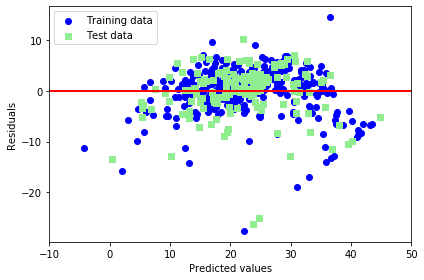

In [7]:
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred,
    y_test_pred - y_test,
    c='lightgreen',
    marker='s',
    label='Test data')
plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

## Implementing the Linear Regression
Now, let's implement our own linear regression model. It is almost the same as the Adaline classifier we have implemented:

In [8]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
        self.cost_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            
            # Cost function
            error = (y - output)
            cost = (error**2).sum() / 2.0
            self.cost_.append(cost)
            
            # Update rule
            self.w_[1:] += self.eta * X.T.dot(error)
            self.w_[0] += self.eta * error.sum()
            
        return self

    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]

    def predict(self, X):
        return self.net_input(X)

It is always a good practice to plot the cost as a function of the number of epochs (passes over the training dataset) when we are using optimization algorithms, such as gradient descent, to check for the convergence:

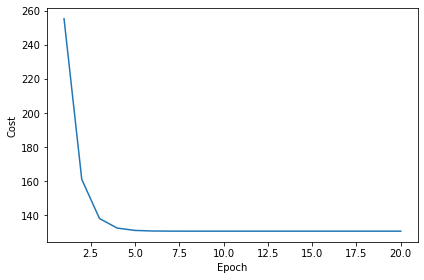

In [9]:
sc_x = StandardScaler()
sc_y = StandardScaler()
X_rm_std = sc_x.fit_transform(X_rm)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

lr = LinearRegressionGD()
lr.fit(X_rm_std, y_std)

plt.plot(range(1, lr.n_iter + 1), lr.cost_)
plt.ylabel('Cost')
plt.xlabel('Epoch')
plt.tight_layout()
plt.show()

Next, let's visualize how well the linear regression line fits the training data:

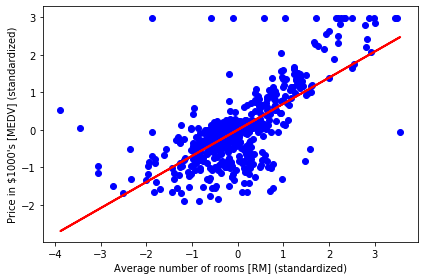

In [10]:
lin_regplot(X_rm_std, y_std, lr)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.tight_layout()
plt.show()

We can see that the overall result looks almost identical to the Scikit-learn implementation. Note, however, that the implementation in Scikit-learn makes use of the [LIBLINEAR](http://www.csie.ntu.edu.tw/~cjlin/liblinear/) library and advanced optimization algorithms that work better with unstandardized variables.

## Polynomial Regression
Linear regression assumes a linear relationship between explanatory and response variables, which may **not** hold in the real world. For example, by seeing the pairwise distribution plot again, we find that the LSTAT (% lower status of the population) attribute is clearly not linearly correlated with our target variable MEDV. Next, let's construct polynomial features and turn our linear regression models into the polynomial ones.

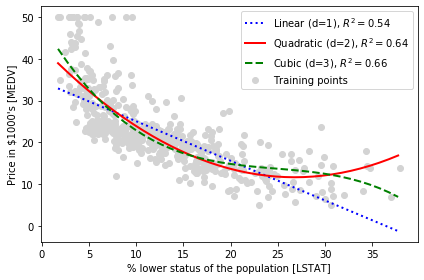

In [11]:
X_lin = df['LSTAT'].values[:, np.newaxis]

regr = LinearRegression()

# Create quadratic features
quadratic = PolynomialFeatures(degree=2)
cubic = PolynomialFeatures(degree=3)
X_quad = quadratic.fit_transform(X_lin)
X_cubic = cubic.fit_transform(X_lin)

# Fit features
lin_regr = LinearRegression()
lin_regr.fit(X_lin, y)
linear_r2 = r2_score(y, lin_regr.predict(X_lin))

quad_regr = LinearRegression()
quad_regr.fit(X_quad, y)
quadratic_r2 = r2_score(y, quad_regr.predict(X_quad))

cubic_regr = LinearRegression()
cubic_regr.fit(X_cubic, y)
cubic_r2 = r2_score(y, cubic_regr.predict(X_cubic))

# Plot results
X_range = np.arange(X_lin.min(), X_lin.max(), 1)[:, np.newaxis]
y_lin_pred = lin_regr.predict(X_range)
y_quad_pred = quad_regr.predict(quadratic.fit_transform(X_range))
y_cubic_pred = cubic_regr.predict(cubic.fit_transform(X_range))

plt.scatter(X_lin, y, label='Training points', color='lightgray')

plt.plot(
    X_range,
    y_lin_pred,
    label='Linear (d=1), $R^2=%.2f$' % linear_r2,
    color='blue',
    lw=2,
    linestyle=':')

plt.plot(
    X_range,
    y_quad_pred,
    label='Quadratic (d=2), $R^2=%.2f$' % quadratic_r2,
    color='red',
    lw=2,
    linestyle='-')

plt.plot(
    X_range,
    y_cubic_pred,
    label='Cubic (d=3), $R^2=%.2f$' % cubic_r2,
    color='green',
    lw=2,
    linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()

In the resulting plot, we can see that the polynomial fit captures the relationship between the response and explanatory variable much better than the linear fit.

## Multivariate Cases
Next, we train polynomial regressors of different degrees using all features in the Housing dataset and compare their performance.

In [12]:
regr = LinearRegression()

print('[Linear]')
print('#Features: %d' % X_train_std.shape[1])
regr = regr.fit(X_train_std, y_train)
y_train_pred = regr.predict(X_train_std)
y_test_pred = regr.predict(X_test_std)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

print('\n[Quadratic]')
X_quad_train = quadratic.fit_transform(X_train_std)
X_quad_test = quadratic.fit_transform(X_test_std)
print('#Features: %d' % X_quad_train.shape[1])
regr = regr.fit(X_quad_train, y_train)
y_train_pred = regr.predict(X_quad_train)
y_test_pred = regr.predict(X_quad_test)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

print('\n[Cubic]')
X_cubic_train = cubic.fit_transform(X_train_std)
X_cubic_test = cubic.fit_transform(X_test_std)
print('#Features: %d' % X_cubic_train.shape[1])
regr = regr.fit(X_cubic_train, y_train)
y_train_pred = regr.predict(X_cubic_train)
y_test_pred = regr.predict(X_cubic_test)
print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

[Linear]
#Features: 13
MSE train: 19.96, test: 27.20
R^2 train: 0.76, test: 0.67

[Quadratic]
#Features: 105
MSE train: 4.10, test: 29.41
R^2 train: 0.95, test: 0.65

[Cubic]
#Features: 560
MSE train: 0.00, test: 21611.28
R^2 train: 1.00, test: -258.55


We notice a very interesting behavior here. As the degree of polynomial goes up, the training errors decrease, but **not** the test errors. That is, **a low training error does not imply a low test error**. We will discuss this further in our next lecture.

## Decision Tree Regression
Polynomial regression is not the only way to capture the nonlinear relationship between the explanatory and target variables. For example, we can modify the Decision Tree model for non-linear regression by simply replacing the entropy as the impurity measure of a node by the MSE. Let's see how it works in our task:

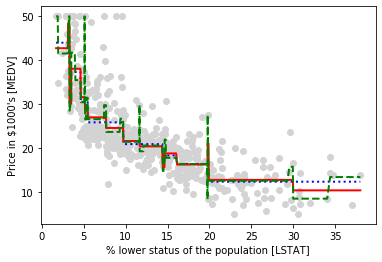

In [13]:
tree_3 = DecisionTreeRegressor(max_depth=3)
tree_3.fit(X_lin, y)
tree_4 = DecisionTreeRegressor(max_depth=4)
tree_4.fit(X_lin, y)
tree_5 = DecisionTreeRegressor(max_depth=5)
tree_5.fit(X_lin, y)

sort_idx = X_lin.flatten().argsort()

plt.scatter(X_lin, y, color='lightgray')

plt.plot(
    X_lin[sort_idx],
    tree_3.predict(X_lin)[sort_idx],
    color='blue',
    lw=2,
    linestyle=':')
plt.plot(
    X_lin[sort_idx],
    tree_4.predict(X_lin)[sort_idx],
    color='red',
    lw=2,
    linestyle='-')

plt.plot(
    X_lin[sort_idx],
    tree_5.predict(X_lin)[sort_idx],
    color='green',
    lw=2,
    linestyle='--')

plt.xlabel('% lower status of the population [LSTAT]')
plt.ylabel('Price in $1000\'s [MEDV]')
plt.show()

As we can see from the resulting plot, the decision tree captures the general trend in the data. However, a limitation of this model is that it does not capture the continuity and differentiability of the desired prediction.

## Random Forest Regression
We can also modify the Random Forest model for regression to take advantages of an ensemble technique and get a better generalization performance. The basic random forests algorithm for regression is almost identical to the random forest algorithm for classification. The only difference is that we use the MSE criterion to grow individual decision trees, and the predicted target variable is calculated as the average prediction over all decision trees. Now, let's use all the features in the Housing dataset to train a random forest regression model:

MSE train: 1.41, test: 14.36
R^2 train: 0.98, test: 0.83


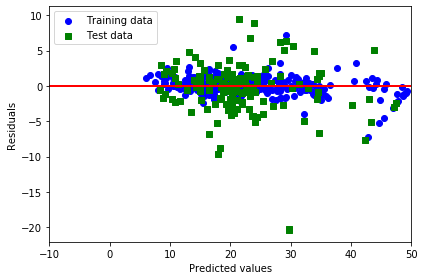

In [14]:
forest = RandomForestRegressor(
    n_estimators=1000, criterion='mse', random_state=1, n_jobs=-1)
forest.fit(X_train, y_train)
y_train_pred = forest.predict(X_train)
y_test_pred = forest.predict(X_test)

print('MSE train: %.2f, test: %.2f' %
      (mean_squared_error(y_train, y_train_pred),
       mean_squared_error(y_test, y_test_pred)))
print('R^2 train: %.2f, test: %.2f' % (r2_score(y_train, y_train_pred),
                                       r2_score(y_test, y_test_pred)))

# Residual plot
plt.scatter(
    y_train_pred,
    y_train_pred - y_train,
    c='blue',
    marker='o',
    label='Training data')
plt.scatter(
    y_test_pred, y_test_pred - y_test, c='green', marker='s', label='Test data')

plt.xlabel('Predicted values')
plt.ylabel('Residuals')
plt.legend(loc='upper left')
plt.hlines(y=0, xmin=-10, xmax=50, lw=2, color='red')
plt.xlim([-10, 50])
plt.tight_layout()
plt.show()

We get better testing results ($R^2=0.83$) than those of multivariate linear regression ($R^2=0.67$) and see weaker patterns in the residual plot. However, we still observe that the testing performance is much worse than the training one. Understanding how the testing performance differs from the training performance is crucial, and we will dive into this topic in the next lecture.

NOTE: As in the classification, Decision Tree and Random Forest regression has a nice feature that they are **not** sensitive to the scaling of each explanatory variable, thus we do not standardize features this time.

## Remarks
1. Regression models are basically interpolation equations over the range of the explanatory variables. So they may give bad predictions if we extrapolate outside this range.
2. Be careful about the outliers, which may change your regression hyperplane undesirably.

# <center>Assignmant</center>
In this assignment, you need to train regression models on [Beijing PM2.5 dataset](http://archive.ics.uci.edu/ml/datasets/Beijing+PM2.5+Data) in winter of 2014.
1. You have to implement 
    - a Linear(Polynomial) regressor
    - a Random Forest regressor
2. You need to show a residual plot for each of your model on both training data and testing data.
3. $R^2$ score need to be larger than 0.72 on testing data.

## Requirements:
- Submit to eeclass with your code file ```Lab04-1_{student_id}.ipynb``` (e.g. ```Lab04_110069999.ipynb```).
- The code file only contains the Assignment part.
- Your .ipynb file should contains the output figures(the residual plots).
- Deadline: **2020-10-14(Thur) 23:59**.

In [15]:
"""
# Do not modify
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import Image

# inline plotting instead of popping out
%matplotlib inline
"""

df = pd.read_csv(
    'http://archive.ics.uci.edu/ml/machine-learning-databases/00381/PRSA_data_2010.1.1-2014.12.31.csv',
    sep=',')
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,cbwd,Iws,Is,Ir
0,1,2010,1,1,0,NaN,-21,-11.0,1021.0,NW,1.79,0,0
1,2,2010,1,1,1,NaN,-21,-12.0,1020.0,NW,4.92,0,0
2,3,2010,1,1,2,NaN,-21,-11.0,1019.0,NW,6.71,0,0
3,4,2010,1,1,3,NaN,-21,-14.0,1019.0,NW,9.84,0,0
4,5,2010,1,1,4,NaN,-20,-12.0,1018.0,NW,12.97,0,0


In the latter course, we will teach how to deal with those sample whose has **nan** (not a number) or non-scalar features. For now, we just remove them.

In [16]:
# Do not modify
df = df.drop(['cbwd'], axis=1)  # drop non-scalar feature
df = df.dropna(axis=0, how='any')  # drop samples who has nan feature
df.head()

,No,year,month,day,hour,pm2.5,DEWP,TEMP,PRES,Iws,Is,Ir
24,25,2010,1,2,0,129.0,-16,-4.0,1020.0,1.79,0,0
25,26,2010,1,2,1,148.0,-15,-4.0,1020.0,2.68,0,0
26,27,2010,1,2,2,159.0,-11,-5.0,1021.0,3.57,0,0
27,28,2010,1,2,3,181.0,-7,-5.0,1022.0,5.36,1,0
28,29,2010,1,2,4,138.0,-7,-5.0,1022.0,6.25,2,0


In the following, we select data that are recorded in winter between 2013 and 2014.

In [17]:
# Do not modify
idx = np.logical_or(
    np.logical_and(df['year'].values == 2014, df['month'].values < 3),
    np.logical_and(df['year'].values == 2013, df['month'].values == 12))
X = df.loc[idx].drop('pm2.5', axis=1)
y = df.loc[idx]['pm2.5'].values
X.head()

,No,year,month,day,hour,DEWP,TEMP,PRES,Iws,Is,Ir
34320,34321,2013,12,1,0,-13,-2.0,1026.0,0.89,0,0
34321,34322,2013,12,1,1,-14,-3.0,1025.0,3.13,0,0
34322,34323,2013,12,1,2,-13,-3.0,1025.0,0.89,0,0
34323,34324,2013,12,1,3,-13,-4.0,1025.0,0.89,0,0
34324,34325,2013,12,1,4,-13,-3.0,1025.0,1.78,0,0
